# Week 1 assignment:

Watch FastAI lesson - https://course.fast.ai/videos/?lesson=1

Once you've watched the videos and have a good feeling for what was done do the following:
1.  Start a new notebook
2.  Import the FastAI libs and enter the notebook magics at the top
3.  Using what you've learned train a ResNet34 on the full MNIST dataset (`URLs.MNIST`)
To successfully complete the assignment you will need to:
1.  Demonstrate a minimum accuracy of 97% (if you're using accuracy in your metrics display, it should be above 0.97, if error_rate, it should be below 0.03)
2.  Plot a confusion matrix with a figure size of (10,10) and a dpi of 60
3.  Plot your top 6 losses
4.  Post a link to your notebook in `#lesson-1-hw-turn-in` on Discord

*Extra Credit:*

Explain what the confusion matrix and the top losses are showing you in your own words.
Tips for this week:
- You will need to add `"train='training', valid='testing'"` to your from_folder call
- DO NOT COPY AND PASTE from Jeremy's notebook to your own.  Even if you're entering the EXACT SAME THING there is value in typing it yourself.  It will stick with you MUCH MUCH better.

Import the right packages and perform magic statements

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Display path to MNIST dataset and show the directory structure

In [0]:
path = untar_data(URLs.MNIST)
print(path)

/root/.fastai/data/mnist_png


In [0]:
print(path.ls())

[PosixPath('/root/.fastai/data/mnist_png/training'), PosixPath('/root/.fastai/data/mnist_png/testing'), PosixPath('/root/.fastai/data/mnist_png/models')]


Create `ImageDataBunch` from folder

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train='training', valid='testing', ds_tfms=tfms)

Create `cnn_learner` and try training the entire network (i.e. without transfer learning just the dense layers).  First let's find the optimal learning rate on just the dense layers

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


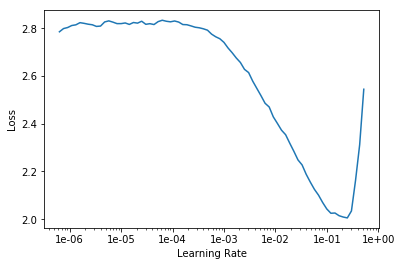

In [0]:
learn.lr_find()
learn.recorder.plot()

Let's apply 0.01 to the conv layers and 0.1 to the dense layers given the above plot

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(0.01, 0.1))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.221506,0.611088,0.029500,0.970500,01:48
1,0.515842,350.376923,0.071600,0.928400,01:47
2,1.879637,81346.640625,0.215200,0.784800,01:48
3,1.235435,121643.312500,0.249700,0.750300,01:50
4,0.945291,0.474614,0.017800,0.982200,01:46
5,0.499799,0.154083,0.010900,0.989100,01:44
6,0.211639,0.957161,0.009000,0.991000,01:47
7,0.100154,11.590994,0.008800,0.991200,01:45
8,0.036726,0.021687,0.005500,0.994500,01:47
9,0.024996,0.023315,0.005600,0.994400,01:45


Plot confusion matrix according to specs.  Note that this is on the validation dataset

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

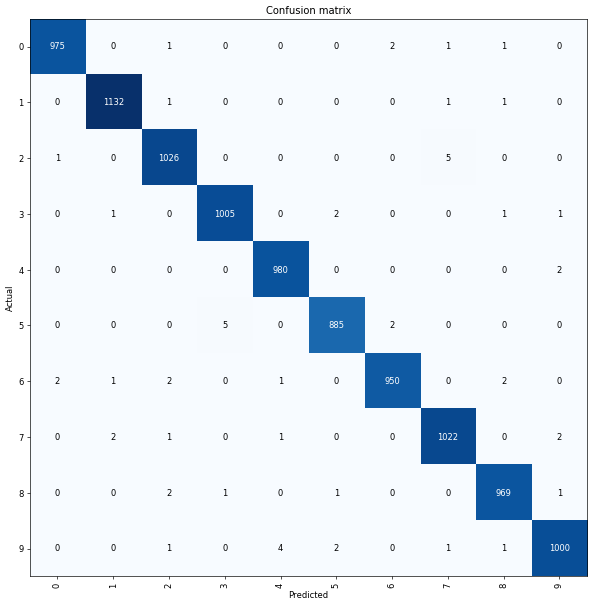

In [0]:
interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

Also plot the 6 most highly misclassified examples

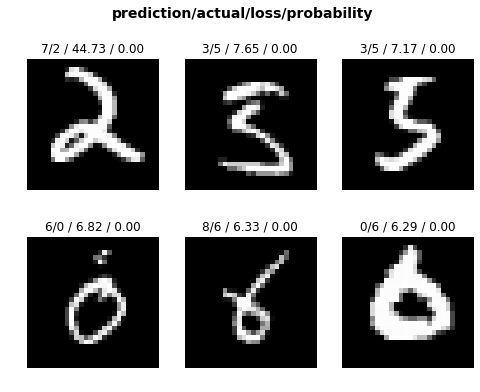

In [0]:
interp.plot_top_losses(6, figsize=(8, 6))

# Extra Credit

1. The confusion matrix is a spatial visualization that tells you very quickly how well the model is correctly classifying each class in your dataset.  Matrix element `(i,j)`, row `i` column `j` in the confusion matrix indicates how many times the model classified an image to be class `j`, given that it belonged to class `i`.  Ideally, we'd expect that none of the off-diagonals are populated and only the diagonals are.  We want to minimize how many entries exist in the off-diagonals.
2. The top losses plot shows you the top $N$ examples in the validation dataset such that they have the largest loss values from the loss function.  Each image in the top losses plot shows you four numbers:
    * The predicted class
    * The true class
    * The loss incurred when classifying the image to belong to the predicted class given the true class
    * What the probability of choosing the true class would be given the image

The general trend is that we see the probability of choosing the true class to be quite small as the classifier was very sure to choose another class.  The loss values should be quite high as these examples disagree with the actual true class.  Finally, the predicted vs. actual classes should make sense where we as humans would hopefully be confused with the same mistakes in prediction just like the trained model.